# Custom Convolution

This convolution operation is created mostly for learning purposes. There are many great libraries implementing convolution filters.
I will create a script that runs the convolution operation based on different filters.
I will apply them to the painting "Girl with a Pearl Earring" by Vermeer. 

## Import Necessary Packages

In [1]:
# Import necessary packages
import numpy as np
from PIL import Image

## Load the Image

In [2]:
# Load image and convert to RGB

# creates an image object
img = Image.open('images/girlWithPearlEarring.jpeg')

# shape 2500*2112*3 = 15.840.000
arr = np.array(img)
# arr.dtype 'uint8'

In [38]:
# img

## 1st Convolution Operation Attempt (unoptimized)

In [ ]:
## First brainstorming attempt, very slow version improvements in the next

n_h = arr.shape[0]
n_w = arr.shape[1]

# filter parameters
f = 3 # width and height
p = 0 # padding
s = 2 # stride 

# output dimensions
n_h_out = np.uint16(np.floor((n_h + 2 * p - f)/s +1))
n_w_out = np.uint16(np.floor((n_w + 2 * p - f)/s +1))
print(f"After the convolution the image will have height {n_h_out} and width {n_w_out}.")

# handle padding
if p != 0:
    arr_p = np.zeros((n_h + 2*p, n_w + 2*p, 3), dtype=np.uint8)
    arr_p[p:n_h+p, p:n_w+p] = arr
    arr = arr_p
    n_h = arr.shape[0]
    n_w = arr.shape[1]

# choose filter to be used

# box blur filter
# filter = (1/9) * np.array([
#     [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
#     [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
#     [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
# ])

# edge detection filter
# filter = np.array([
#     [[-1, -1, -1], [-1, -1, -1], [-1, -1, -1]],
#     [[-1, -1, -1], [ 8,  8,  8], [-1, -1, -1]],
#     [[-1, -1, -1], [-1, -1, -1], [-1, -1, -1]]
# ])

# sharper filter
filter = np.array([
    [[0, 0, 0], [-1, -1, -1], [0, 0, 0]],
    [[-1, -1, -1], [5, 5, 5], [-1, -1, -1]],
    [[0, 0, 0], [-1, -1, -1], [0, 0, 0]]
])

img_out = np.zeros((n_h_out, n_w_out, 3), dtype=np.int32)

w = 0
out_h, out_w = 0, 0
while w + f < arr.shape[1]:
     
    h = 0 
    out_h = 0
    while h + f < arr.shape[0]:
        
        img_part = arr[h:h+f,w:w+f,:]
        img_part_filter = img_part * filter
        sums = np.sum(img_part_filter, axis=(0,1))
        img_out[out_h, out_w, :] = sums

        h += s
        out_h += 1
    if w% 200 == 0:
        print(w)
    w += s 
    out_w += 1


After the convolution the image will have height 1249 and width 1055.
0
200
400
600
800
1000
1200
1400
1600
1800
2000


In [36]:
img_out_3D = np.clip(img_out, 0, 255).astype(np.uint8)
img_part_filtered = Image.fromarray(img_out_3D)

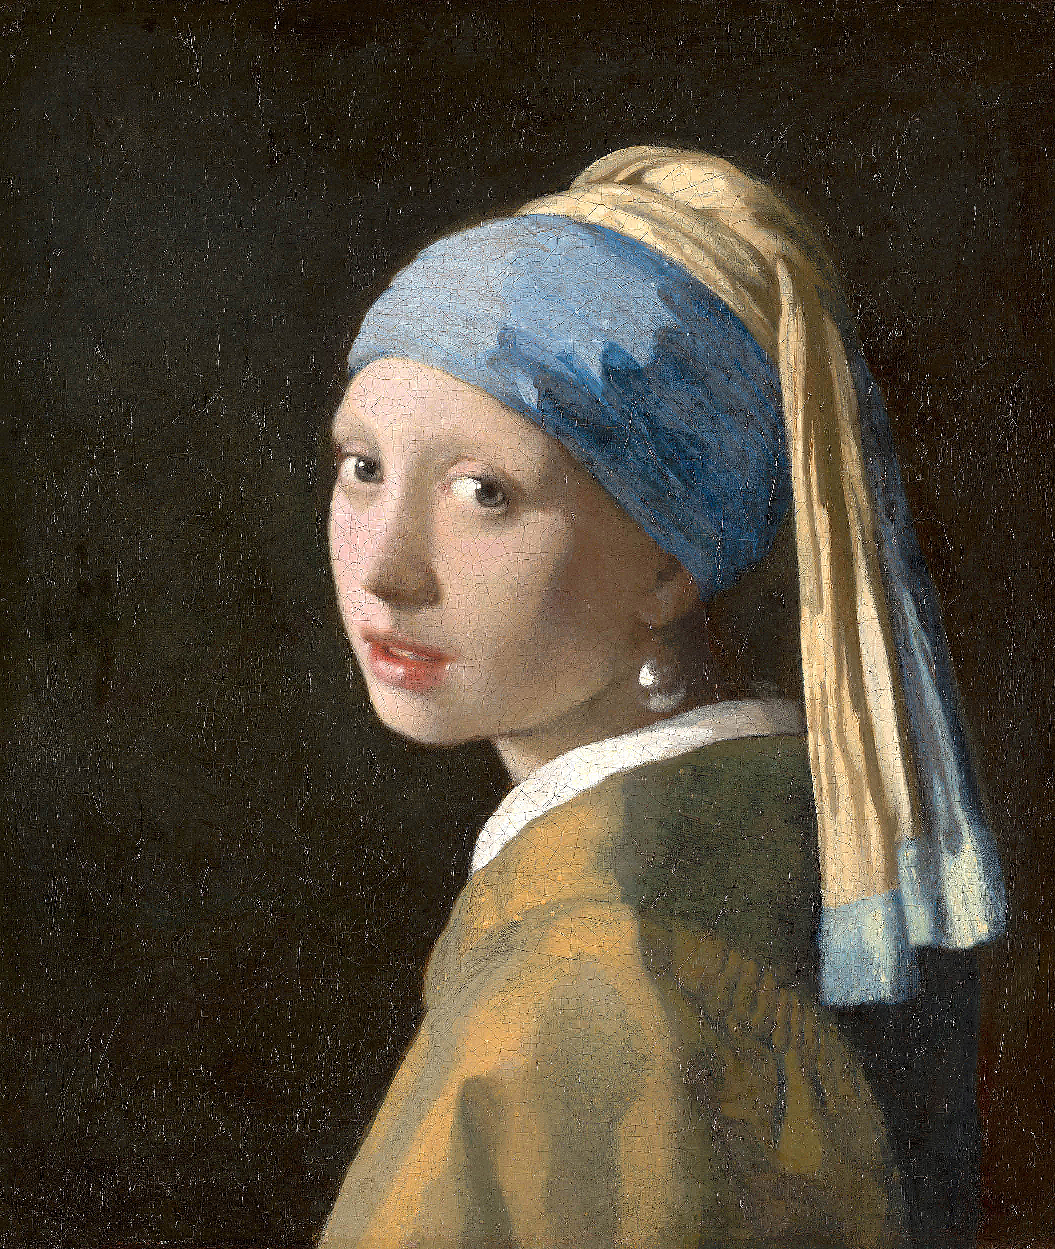

In [37]:
img_part_filtered